# k Nearest Neighbors  
se toma un punto y se le ve el numero k de vecinos y de que tipo son estos vecinos, el número mayor de vecinos será el nuevo tipo del punto


![knn](../../assets/knn.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../Social_Network_Ads.csv")

In [5]:
x = df.iloc[:, [2, 3]]
y = df.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state= 0)

In [7]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)

metric = "minkowski", p=2, sirven pa que la formula de la distancia sea la siguiente: $\sqrt{(x_{11} - x_{12})^2 + (x_{21} - x_{22})^2}$

In [8]:
# auqi ya hago la clasificacion de los datos con el metodo de los knn
from sklearn.neighbors import KNeighborsClassifier
clasificador = KNeighborsClassifier(n_neighbors=5, metric = "minkowski", p=2)
clasificador.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
# predigo los resultados con el modelo
y_pred = clasificador.predict(x_test)

In [16]:
# veo como le fue a los resultados con la matriz de confusion
from sklearn.metrics import confusion_matrix
matrizConfusion = confusion_matrix(y_test, y_pred)
matrizConfusion

array([[64,  4],
       [ 3, 29]])

/home/tomilee/.local/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


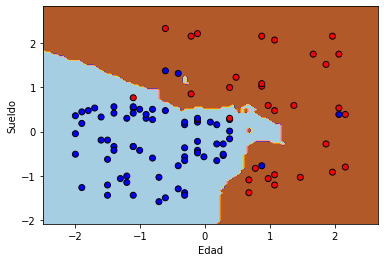

In [20]:
# podemos graficar los knn con la misma funcion que instalé antes
# en la clase habia mucho texto, pero encontré esta funcion en sklearn () advertencia, tener cuidado porque está en la rama inestable de sklearn (version 1.1 creo)
# la version estable es 1.0.2 creo, instalé la version inestable pa usar esto
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clasificador,
    x_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    #plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

# lo anterior solo plotea la linea y colorea los espacios, aqui pongo los puntos
# creo una lista de colores a partir de y_test
colores = ["red" if x != 0 else "blue" for x in y_test]
# aqui grafico usando la lista de colores (esdecolors="k" esta de bonito)
plt.scatter(x_test[:, 0], x_test[:, 1], color = colores, edgecolors="k")
plt.xlabel("Edad")
plt.ylabel("Sueldo")
plt.show()